# Feature Selection
<hr style="height:1px;border:none;color:#333;background-color:#333;" />


### Importing modules, configuring display options, and loading dataset 

In [400]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# import warnings
# warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, f_classif, mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso

In [401]:
pd.set_option('display.max_columns', None) # display all the columns of a dataframe
pd.set_option('display.max_rows', 100)     # display 100 rows of a dataframe

In [402]:
# Load cleaned data - see "Data Cleansing.ipynb"
dataset = pd.read_csv('../ariel/Price_Data_cleaned.csv')

In [403]:
dict_15 = {'Wd Shng':'WdShing', 'CmentBd':'CemntBd', 'Brk Cmn':'BrkComm'}
dataset.Exterior2nd.replace(dict_15, inplace=True)

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### Explore Dataset

#### Variable types

In [404]:
# Basement - Ava
'BsmtQual', 'BsmtCond','BsmtFinType1', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF'

#Outside of house - Khamanna
'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea'

#Overall- Ariel
'OverallQual', 'OverallCond', 'PavedDrive', 'Fence', 'RoofStyle', 'RoofMatl'
'GarageFinish', 'GarageQual', 'GarageCond',

# Inside House - Shay
'HeatingQC', 'CentralAir', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'LowQualFinSF'
 
# y = beta0 + beta1*X1 + beta2*X2 + beta3*X3 + beta4*X4 ...+ betan*Xn(Exterior Quality)

('HeatingQC',
 'CentralAir',
 'KitchenAbvGr',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'LowQualFinSF')

In [405]:
continues_variables = ['GrLivArea', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF',
                       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
                       'SalePrice', 'LotFrontage']

discrete_variables = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                      'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                      'MoSold', 'YrSold']

categorical_nominal_variables = ['MSSubClass', 'Alley', 'LandContour', 'MSZoning', 'LotConfig', 'Neighborhood',
                                 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                                 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Street', 'Heating',
                                 'GarageType', 'CentralAir', 'MiscFeature', 'SaleType', 'SaleCondition','KitchenQual']

categorical_ordinal_variables = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                                 'HeatingQC', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 
                                 'GarageFinish', 'PavedDrive', 'Fence', 'Functional', 'BsmtFinType2', 'Electrical',
                                 'BsmtFinType1','BsmtExposure', 'LandSlope', 'Utilities', 'LotShape',]


#### Converting Categorical Variables to Ordinal Variables

In [406]:
# Encoding Ordinal Variables
dict_1 = {'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
dict_2 = {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
dict_3 = {'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
dict_4 = {"None":0, "Unf":1, "RFn":2, "Fin":3}
dict_5 = {"N":1, "P":2, "Y":3}
dict_6 = {"None":0, "MnWw":1, "GdWo":2, "MnPrv":3, "GdPrv":4}
dict_7 = {"Sal":1, "Sev":2, "Maj2":3, "Maj1":4, "Mod":5, "Min2":6, "Min1":7, "Typ":8}
dict_8 = {"Mix":1, "FuseP":2, "FuseF":3, "FuseA":4, "SBrkr":5}
dict_9 = {"Sev":1, "Mod":2, "Gtl":3}
dict_10 = {"ELO":1, "NoSeWa":2, "NoSewr":3, "AllPub":4}
dict_11 = {"IR3":1, "IR2":2, "IR1":3, "Reg":4}

dataset.BsmtExposure.replace(dict_1, inplace=True)
dataset.ExterQual.replace(dict_2, inplace=True)
dataset.ExterCond.replace(dict_2, inplace=True)
dataset.BsmtQual.replace(dict_2, inplace=True)
dataset.BsmtCond.replace(dict_2, inplace=True)
dataset.HeatingQC.replace(dict_2, inplace=True)
#dataset.KitchenQual.replace(dict_2, inplace=True)
dataset.FireplaceQu.replace(dict_2, inplace=True)
dataset.GarageQual.replace(dict_2, inplace=True)
dataset.GarageCond.replace(dict_2, inplace=True)
dataset.PoolQC.replace(dict_2, inplace=True)
dataset.BsmtFinType1.replace(dict_3, inplace=True)
dataset.BsmtFinType2.replace(dict_3, inplace=True)
dataset.GarageFinish.replace(dict_4, inplace=True)
dataset.PavedDrive.replace(dict_5, inplace=True)
dataset.Fence.replace(dict_6, inplace=True)
dataset.Functional.replace(dict_7, inplace=True)
dataset.Electrical.replace(dict_8, inplace=True)
dataset.LandSlope.replace(dict_9, inplace=True)
dataset.Utilities.replace(dict_10, inplace=True)
dataset.LotShape.replace(dict_11, inplace=True)


#### Converting Categorical Variable to Dummy Variables

In [407]:
# set the MSSubClass column to object, since it is a nominal variable
dataset['MSSubClass'] = dataset['MSSubClass'].astype(object)

In [408]:
# new dataset that will hold the encoded categorical variables + all the others
dataset_encoded = dataset.copy()

In [409]:
# Encode all categorical nominal variables
for column_name in categorical_nominal_variables:
    dataset_encoded = pd.concat([dataset_encoded, pd.get_dummies(dataset_encoded[column_name],\
                                                                 prefix=column_name, drop_first=True)], axis=1)

In [410]:
# Remove original categorical columns
dataset_encoded = dataset_encoded.drop(categorical_nominal_variables, axis=1)

In [411]:
dataset_encoded

,GrLivArea,SalePrice,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Street_Pave,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,CentralAir_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA
0,856,126000,64.0,7890,4,4,3,6,6,1939,1950,0.0,3,3,3,3,1,3,238.0,1,0.0,618.0,856.0,3,5,856,0,0,1.0,0.0,1,0,2,1,4,8,1,4,1939.0,1,2.0,399.0,3,3,3,0,0,0,0,166,0,0,0,0,3,2010,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,1049,139500,42.0,4235,4,4,3,5,5,19

#### MultiCollinearity

In [412]:
# Generate correlation matrix (continues variables only)
corr_matrix = dataset[continues_variables].corr(method="pearson") # pearson? kendall? which is best

In [413]:
# List of highly (>0.79) correlated pair of variables
c_m = list(corr_matrix.columns)
for index_ in corr_matrix.columns:
    c_m.remove(index_)
    for feature in c_m:
        if abs(corr_matrix.loc[index_,feature])>0.7:
            print(index_,"_",feature,": ",corr_matrix.loc[index_,feature], sep="")

GrLivArea_SalePrice: 0.7199799401450586
TotalBsmtSF_1stFlrSF: 0.7842803487175525


In [414]:
# plt.figure(figsize=(14,10))
# sns.heatmap(corr_matrix, vmin=-1, vmax=1, linewidths=.5, annot=True)

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### Feature Selection

#### Using Lasso Regression to Select Features

In [415]:
X = dataset_encoded.drop('SalePrice',axis=1)  # features
y = dataset_encoded['SalePrice']         # target
X_norm = MinMaxScaler().fit_transform(X)      # Transform features by scaling each feature to a given range.

In [416]:
num_f = 10 # number of features to select
# SelectFromModel -> Meta-transformer for selecting features based on importance weights.
embeded_lr_selector = SelectFromModel(Lasso(alpha=0.001), max_features=num_f)
# Penalty="l1" -> indicates regularization using L1
embeded_lr_selector.fit(X_norm, y) # Fit the SelectFromModel meta-transformer.

embeded_lr_support = embeded_lr_selector.get_support() # Get a mask, or integer index, of the features selected
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist() # List of features
print(str(len(embeded_lr_feature)), 'selected features')

10 selected features


/Users/ki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 508867731645.4075, tolerance: 1451865022.2764199
  positive)


In [417]:
# embeded_lr_feature
# list_features = [x[0:(x.find("_"))] for x in embeded_lr_feature]
list_features = []
for column_name in embeded_lr_feature:
    if '_' in column_name:
        list_features.append(column_name[0:column_name.find("_")])
    else:
        list_features.append(column_name)


In [418]:
embeded_lr_feature

['GrLivArea',
 'LotArea',
 'BsmtFinSF1',
 '1stFlrSF',
 'PoolArea',
 'PoolQC',
 'Neighborhood_GrnHill',
 'Condition2_PosA',
 'Condition2_PosN',
 'RoofMatl_WdShngl']

In [419]:
list_feat = set(list_features)

In [420]:
dataset[list_feat].dtypes.sort_values()

PoolArea          int64
LotArea           int64
GrLivArea         int64
1stFlrSF          int64
PoolQC            int64
BsmtFinSF1      float64
Neighborhood     object
Condition2       object
RoofMatl         object
dtype: object

In [421]:
list(list_feat)

['PoolArea',
 'LotArea',
 'GrLivArea',
 'BsmtFinSF1',
 'Neighborhood',
 'Condition2',
 'RoofMatl',
 '1stFlrSF',
 'PoolQC']

#### Using F Test to Select Features

In [422]:
value_f, p_f = f_classif(X_norm, y)
pd.Series(p_f, index=X.columns).sort_values().head(20)

/Users/ki/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


SaleCondition_Partial     0.000000e+00
Condition2_PosN           0.000000e+00
MSSubClass_150            0.000000e+00
SaleType_New              0.000000e+00
Exterior1st_ImStucc       0.000000e+00
Condition2_RRAn           0.000000e+00
SaleCondition_Alloca     8.146065e-305
OverallQual              3.640980e-271
Condition2_PosA          3.008646e-213
GrLivArea                2.544883e-177
Street_Pave              1.161482e-171
ExterQual                2.922177e-141
Neighborhood_NridgHt     2.191582e-135
Neighborhood_NoRidge     8.940149e-124
1stFlrSF                 1.045746e-112
TotalBsmtSF              3.097936e-111
GarageCars               5.613187e-107
GarageArea                1.012057e-98
BsmtQual                  4.494704e-94
MSZoning_C (all)          4.800441e-91
dtype: float64

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### Descriptive Modeling

#### Train and Test data

In [423]:
dataset['Year.Diff'] = dataset['YrSold']- dataset['YearRemodAdd']

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [425]:
test = dataset[dataset['Year.Diff']<=10]
train = dataset[dataset['Year.Diff']>10]

In [426]:
train.shape, test.shape

((1562, 81), (1017, 81))

In [427]:
X_train.shape

(1934, 221)

In [428]:
temp_col = ['1stFlrSF','OverallQual','LotArea','BsmtFinSF1','GrLivArea','Condition2', 'GarageCars','Neighborhood', 'Street']

In [429]:
temp_col1 = ['1stFlrSF','OverallQual','LotArea','BsmtFinSF1','GrLivArea']
#temp_col2 = pd.concat(X_train[['1stFlrSF','OverallQual','LotArea','BsmtFinSF1','GrLivArea']],\
                   #   X_train.filter(like="Neighborhood"),X_train.filter(like="Condition2"))

In [430]:
X_train.shape

(1934, 221)

In [431]:
X_test.shape

(645, 221)

In [432]:
y_train.shape

(1934,)

In [433]:
y_test.shape

(645,)

In [434]:
#645/2579 (split 75/25)

#### Multiple Linear Regression (All the variables)

In [435]:
mlr_model = LinearRegression()
mlr_model.fit(X_train,np.log(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [436]:
mlr_model.score(X_train,np.log(y_train))

0.9385657273088249

In [437]:
# Overfitting when using all the features to train the model
mlr_model.score(X_test,np.log(y_test))

-558986528.098726

<hr>

#### Linear Model with limited variables

In [438]:
temp_col = ['Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide','Neighborhood_ClearCr', \
            'Neighborhood_CollgCr', 'Neighborhood_Crawfor','Neighborhood_Edwards', 'Neighborhood_Gilbert', \
            'Neighborhood_Greens','Neighborhood_GrnHill', 'Neighborhood_IDOTRR', 'Neighborhood_Landmrk',\
            'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes','Neighborhood_NPkVill', \
            'Neighborhood_NWAmes', 'Neighborhood_NoRidge','Neighborhood_NridgHt', 'Neighborhood_OldTown', \
            'Neighborhood_SWISU','Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',\
            'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker'] \
            + ['GrLivArea','LotArea','OverallQual','OverallCond','TotalBsmtSF','YearBuilt',]

In [439]:
# X_train.filter(like="Neighborhood").columns.tolist() 
# X_train.filter(like="Condition2").columns.tolist()
temp_col1 = ['1stFlrSF','OverallQual','LotArea','BsmtFinSF1','GrLivArea']
#temp_col2 = pd.concat(X_train[['1stFlrSF','OverallQual','LotArea','BsmtFinSF1','GrLivArea']],\
     #                 X_train.filter(like="Neighborhood"),X_train.filter(like="Condition2"))

In [440]:
mlr_model.fit(X[temp_col], np.log(y))
mlr_model.score(X_train[temp_col], np.log(y_train))

0.8864686586549148

In [441]:
mlr_model.score(X_test[temp_col], np.log(y_test))

0.9000153663966232

In [442]:
X[temp_col].columns

Index(['Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Greens',
       'Neighborhood_GrnHill', 'Neighborhood_IDOTRR', 'Neighborhood_Landmrk',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'GrLivArea', 'LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF',
       'YearBuilt'],
      dtype='object')

In [443]:
mlr_model.coef_

array([-7.42758797e-02, -1.93348519e-01, -4.42228316e-03,  9.87432878e-02,
        2.69469238e-02,  1.38810428e-01, -4.66244493e-02,  2.02919405e-02,
        1.00308932e-01,  4.83127452e-01, -1.05542449e-01, -7.82804355e-02,
       -2.03783486e-01,  2.01124763e-02,  4.21464845e-04, -7.72437121e-02,
       -1.75882593e-02,  9.67115714e-02,  1.19362099e-01, -6.39380520e-02,
       -3.64885618e-02,  8.51376837e-03, -1.13566074e-02,  7.25831133e-02,
        1.34632081e-01,  6.79553621e-02,  6.16247629e-02,  2.89538790e-04,
        3.39248145e-06,  8.00467004e-02,  6.38013843e-02,  1.63011793e-04,
        3.58483673e-03])

In [444]:
a = pd.DataFrame(zip(X[temp_col], mlr_model.coef_), columns = ['Temp.Cols', 'Temp.Coefs'])
a

,Temp.Cols,Temp.Coefs
0,Neighborhood_Blueste,-0.074276
1,Neighborhood_BrDale,-0.193349
2,Neighborhood_BrkSide,-0.004422
3,Neighborhood_ClearCr,0.098743
4,Neighborhood_CollgCr,0.026947
5,Neighborhood_Crawfor,0.138810
6,Neighborhood_Edwards,-0.046624
7,Neighborhood_Gilbert,0.020292
8,Neighborhood_Greens,0.100309
9,Neighborhood_GrnHill,0.483127


<hr>

In [454]:
# adding Kitchen Quality
temp_col_k = ['1stFlrSF','OverallQual','LotArea','BsmtFinSF1','GrLivArea','KitchenQual_Gd',\
              'Exterior2nd_PreCast','Exterior2nd_VinylSd']

In [455]:
mlr_model.fit(X[temp_col_k], np.log(y))
mlr_model.score(X_train[temp_col_k], np.log(y_train))

0.838496548747817

In [456]:
mlr_model.score(X_test[temp_col_k], np.log(y_test))

0.854903678875107

In [457]:
X_test[temp_col_k].columns

Index(['1stFlrSF', 'OverallQual', 'LotArea', 'BsmtFinSF1', 'GrLivArea',
       'KitchenQual_Gd', 'Exterior2nd_PreCast', 'Exterior2nd_VinylSd'],
      dtype='object')

In [458]:
mlr_model.coef_

array([1.33276778e-04, 1.32765778e-01, 3.58273820e-06, 1.64601993e-04,
       2.37178368e-04, 6.03253453e-02, 4.54690482e-01, 7.56866192e-02])

In [459]:
list(zip(X_test[temp_col_k], mlr_model.coef_))#, columns = ['Temp.Cols', 'Temp.Coefs']

[('1stFlrSF', 0.0001332767776370559),
 ('OverallQual', 0.13276577766057995),
 ('LotArea', 3.582738195155419e-06),
 ('BsmtFinSF1', 0.00016460199337944246),
 ('GrLivArea', 0.0002371783677490047),
 ('KitchenQual_Gd', 0.06032534532514806),
 ('Exterior2nd_PreCast', 0.45469048228855363),
 ('Exterior2nd_VinylSd', 0.07568661915693886)]

<hr>

              SoldAfterRemodel  SoldWithoutRemodel
Neighborhood                                      
StoneBr          373513.640000       210577.777778
GrnHill          330000.000000       230000.000000
NoRidge          318447.368421       329149.125000
NridgHt          313662.495868                 NaN
Veenker          280187.500000       245173.684211
Timber           266579.483871       211006.521739
ClearCr          255600.000000       208035.200000
Somerst          230918.713235       186857.142857
Crawfor          229301.346154       191350.560606
Greens           213750.000000       190642.857143
CollgCr          212482.890909       164785.225352
Gilbert          198926.308642       177046.290323
NWAmes           196257.692308       189676.863636
Blmngtn          196237.173913                 NaN
SawyerW          188166.116279       188062.614286
Mitchel          177181.818182       158757.926829
NAmes            159313.492063       142504.397695
Edwards          155850.638298 

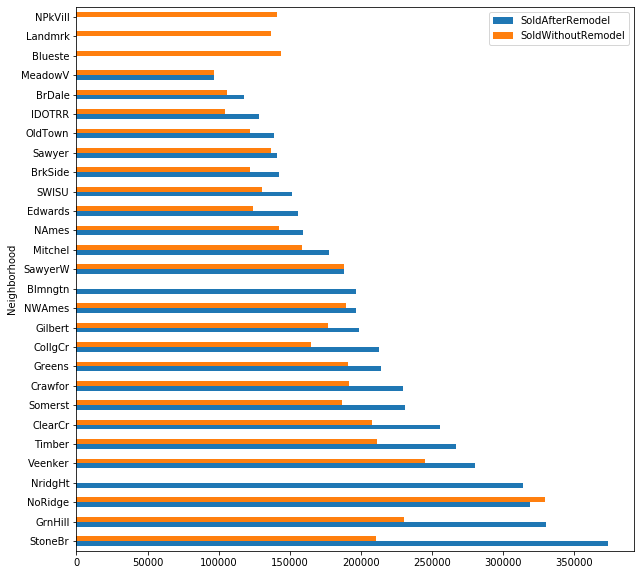

In [37]:
dataset['Year.Diff'] = dataset['YrSold']- dataset['YearRemodAdd']
within = pd.DataFrame(dataset[dataset['Year.Diff']<=9].groupby('Neighborhood')['SalePrice'].mean())
#print(within)
out = pd.DataFrame(dataset[dataset['Year.Diff']>9].groupby('Neighborhood')['SalePrice'].mean())
#print(out)
RemodelDif = pd.merge(within, out, left_on='Neighborhood', right_on = "Neighborhood", how='outer').reset_index()
RemodelDif.columns=['Neighborhood','SoldAfterRemodel','SoldWithoutRemodel']
RemodelDif1 = RemodelDif.set_index('Neighborhood').sort_values(by = "SoldAfterRemodel", axis=0, ascending = False)
print(RemodelDif1)
#drop(RemodelDif.index[[0,16,25,26,27]]).
RemodelDif1.plot(kind='barh', figsize=(10,10))

In [38]:
#dataset.groupby('Neighborhood').YearBuilt.unique()
print(dataset[dataset.Neighborhood == 'NridgHt']['YearBuilt'].unique())
dataset[dataset.Neighborhood == 'NridgHt']['YearBuilt'].shape

[2006 2005 2003 2007 2004 2008 2001 2009 2002]


9

In [8]:
#dataset[dataset.Neighborhood == 'NPkVill']['YearBuilt'].unique()

In [13]:
print(dataset[dataset.Neighborhood == 'Blmngtn']['YearBuilt'].unique())
dataset[dataset.Neighborhood == 'Blmngtn']['YearBuilt'].shape

[2007 2006 2003 2002 2004 2005]


(23,)

In [ ]:
# Exterior1st: Exterior covering on house

#        AsbShng	Asbestos Shingles
#        AsphShn	Asphalt Shingles
#        BrkComm	Brick Common
#        BrkFace	Brick Face
#        CBlock	Cinder Block
#        CemntBd	Cement Board
#        HdBoard	Hard Board
#        ImStucc	Imitation Stucco
#        MetalSd	Metal Siding
#        Other	Other
#        Plywood	Plywood
#        PreCast	PreCast	
#        Stone	Stone
#        Stucco	Stucco
#        VinylSd	Vinyl Siding
#        Wd Sdng	Wood Siding
#        WdShing	Wood Shingles
	
# Exterior2nd: Exterior covering on house (if more than one material)

#        AsbShng	Asbestos Shingles
#        AsphShn	Asphalt Shingles
#        BrkComm	Brick Common
#        BrkFace	Brick Face
#        CBlock	Cinder Block
#        CemntBd	Cement Board
#        HdBoard	Hard Board
#        ImStucc	Imitation Stucco
#        MetalSd	Metal Siding
#        Other	Other
#        Plywood	Plywood
#        PreCast	PreCast
#        Stone	Stone
#        Stucco	Stucco
#        VinylSd	Vinyl Siding
#        Wd Sdng	Wood Siding
#        WdShing	Wood Shingles


# MasVnrType: Masonry veneer type

#        BrkCmn	Brick Common
#        BrkFace	Brick Face
#        CBlock	Cinder Block
#        None	None
#        Stone	Stone
	
# MasVnrArea: Masonry veneer area in square feet

# ExterQual: Evaluates the quality of the material on the exterior 
		
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor
		
# ExterCond: Evaluates the present condition of the material on the exterior
		
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor

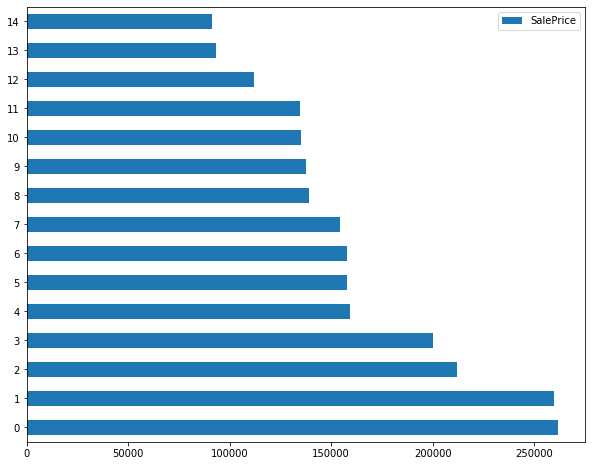

In [206]:

Exterior1st = pd.DataFrame(dataset.groupby('Exterior1st')['SalePrice'].median().sort_values(ascending=False)).reset_index()
Exterior1st.plot(kind = 'barh', figsize = (10,8))
#dataset.groupby('Exterior1st')['SalePrice'].median().sort_values(ascending=False).plot(kind = 'barh', figsize = (10,8))

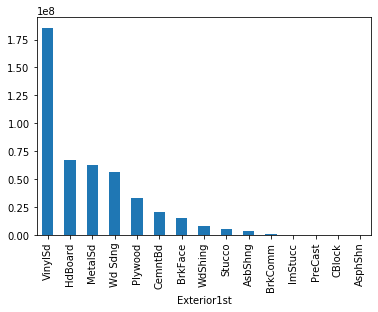

In [208]:
dataset.groupby('Exterior1st')['SalePrice'].sum().sort_values(ascending=False).plot.bar()

In [389]:

Exterior2nd = pd.DataFrame(dataset.groupby('Exterior2nd')['SalePrice'].median().sort_values(ascending=False)).reset_index()
Exterior2nd#.plot(kind = 'barh', figsize = (10,8))
#dataset.groupby('Exterior1st')['SalePrice'].median().sort_values(ascending=False).plot(kind = 'barh', figsize = (10,8))

,Exterior2nd,SalePrice
0,PreCast,260000
1,CemntBd,212000
2,VinylSd,200250
3,ImStucc,196000
4,BrkFace,158000
5,Plywood,157000
6,HdBoard,156000
7,BrkComm,146000
8,Wd Sdng,139000
9,WdShing,138500


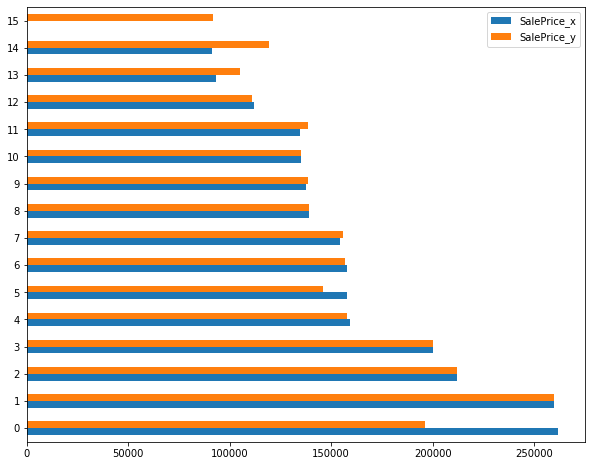

In [195]:
df = pd.merge(Exterior1st, Exterior2nd, left_on = 'Exterior1st', right_on = 'Exterior2nd', how ='outer')
#df
df.plot(kind = 'barh', figsize = (10,8))

In [189]:
print(dataset.loc[dataset['Exterior1st']=='Stone']['Exterior2nd'])
dataset.loc[dataset['Exterior2nd']=='Stone']['Exterior1st']

Series([], Name: Exterior2nd, dtype: object)


1385    BrkFace
1619    BrkFace
1880     Stucco
2220    BrkFace
Name: Exterior1st, dtype: object

In [ ]:
#ImStucc = one observation for Exterior 1st, around 10 for Exterior 2nd
#PreCast = only one observation in both
#CmentBd = tons for Exterior 1st, none for 2nd (change in Exterior 2nd for Wood Shingles for two observations)

In [388]:
dict_15 = {'Wd Shng':'WdShing', 'CmentBd':'CemntBd', 'Brk Cmn':'BrkComm'}
dataset.Exterior2nd.replace(dict_15, inplace=True)

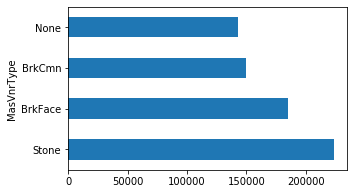

In [188]:
dataset.groupby('MasVnrType')['SalePrice'].median().sort_values(ascending=False).plot(kind = 'barh', figsize = (5,3))

In [213]:
dataset.groupby('MasVnrType')['SalePrice'].count().sort_values(ascending=False)#.plot(kind = 'barh', figsize = (5,3))

MasVnrType
None       1572
BrkFace     804
Stone       183
BrkCmn       20
Name: SalePrice, dtype: int64

In [ ]:
#??Impute the "None"?? Otherwise there's bias

In [244]:
dataset[dataset['MasVnrArea']==0]['SalePrice'].sum()

242708700

In [243]:
dataset[dataset['MasVnrArea']!='None']['SalePrice'].sum()

459199828

In [254]:
dataset.groupby('ExterQual')['SalePrice'].count().sort_values(ascending=False)

ExterQual
TA    1635
Gd     841
Ex      73
Fa      30
Name: SalePrice, dtype: int64

In [252]:
dataset.groupby('ExterQual')['YearBuilt'].count()

ExterQual
Ex      73
Fa      30
Gd     841
TA    1635
Name: YearBuilt, dtype: int64

In [250]:
dataset.groupby('ExterCond')['YearBuilt'].count()

ExterCond
Ex      11
Fa      56
Gd     279
Po       2
TA    2231
Name: YearBuilt, dtype: int64